Project

2.Heart Disease Risk Classification Using Clinical Patient Data

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [61]:
df = pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction (1).csv')

In [62]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


Data Exploration

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [64]:
df.shape

(270, 14)

In [65]:
df.isna().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


<Axes: >

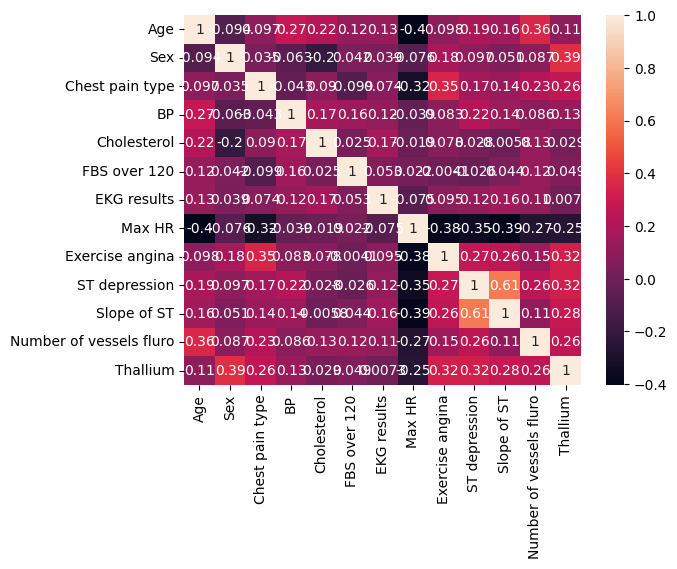

In [66]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


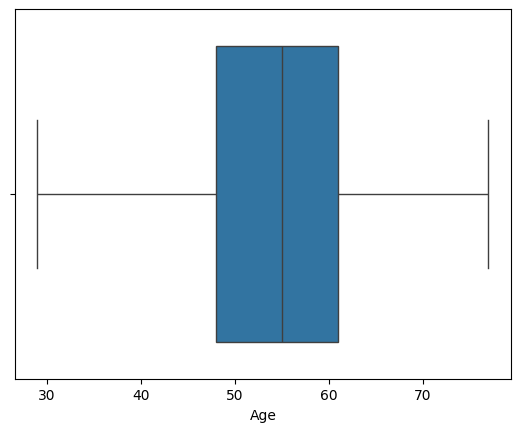

In [67]:
sns.boxplot(x=df['Age'])
df

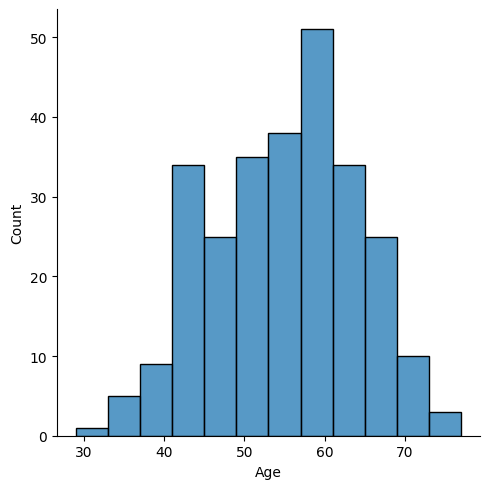

In [68]:
sns.displot(df['Age'])

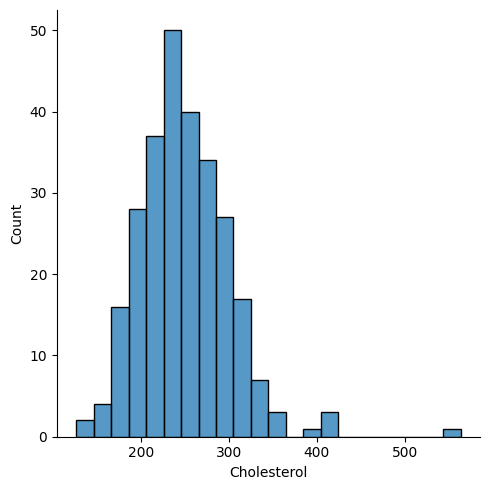

In [69]:
sns.displot(df['Cholesterol'])

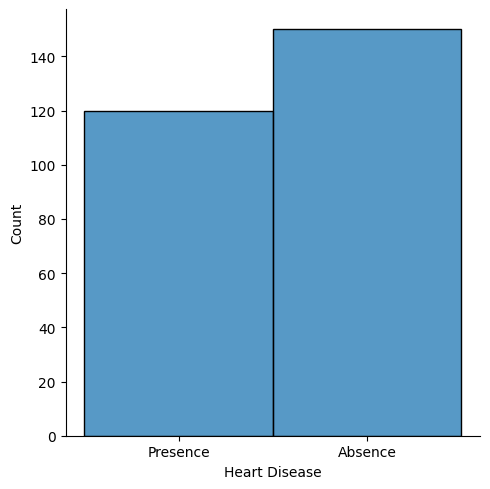

In [70]:
sns.displot(df['Heart Disease'])

EDA

In [71]:
df.corr(numeric_only=True)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [72]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [73]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


Encoding (get dummies)

In [74]:
df = pd.get_dummies(
    df,
    columns=[],   # add column names if needed
    drop_first=True
)


In [75]:
df.head()



,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [76]:
df.dtypes

,0
Age,int64
Sex,int64
Chest pain type,int64
BP,int64
Cholesterol,int64
FBS over 120,int64
EKG results,int64
Max HR,int64
Exercise angina,int64
ST depression,float64


Data Wrangling

Assigning x & y
     and
Data balancing     


In [77]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state=42)

x = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

x_new,y_new = rs.fit_resample(x,y)
print("After undersampling dataset shape")
y_new.value_counts()

After undersampling dataset shape


,count
Heart Disease,
Absence,120
Presence,120


Train | test split

In [78]:
# Train | test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

In [79]:
print(x_train.shape)
print(x_test.shape)

(216, 13)
(54, 13)


Modelling


In [80]:
# logistic
from sklearn.linear_model import LogisticRegression    # import ML algorithm
log_model = LogisticRegression()                       # save to a model
log_model.fit(x_train,y_train)                         # model.fit()

LogisticRegression()

1. Accuracy (Train,test,CV)

In [81]:
from sklearn.metrics import accuracy_score

ypred_train = log_model.predict(x_train)
ypred_test = log_model.predict(x_test)

print('Train accuracy',accuracy_score(y_train,ypred_train))
print('Test accuracy',accuracy_score(y_test,ypred_test))


from sklearn.model_selection import cross_val_score
score = cross_val_score(log_model,x,y,cv=5)

print('Cross Validation',score.mean())

Train accuracy 0.8425925925925926
Test accuracy 0.8888888888888888
Cross Validation 0.8481481481481483


KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
y_pred_train = knn_model.predict(x_train)
y_pred_test = knn_model.predict(x_test)

from sklearn.metrics import accuracy_score
print('Train:',accuracy_score(y_train,y_pred_train))
print('Test:',accuracy_score(y_test,y_pred_test))


from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model,x,y,cv=5)
print('cross_validation:',scores.mean())

Train: 0.7592592592592593
Test: 0.6666666666666666
cross_validation: 0.6814814814814815


In [84]:
# Hyperparameter for KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# model
estimator = KNeighborsClassifier()

# parameters (which you want to tune and identify the best)
param_grad = {'n_neighbors': list(range(1, 31))}

grid = GridSearchCV(estimator, param_grad, scoring='accuracy', cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'n_neighbors': 5}

In [85]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print('Train accuracy:',accuracy_score(y_train,ypred_train))
print('Test accuracy:',accuracy_score(y_test,ypred_test))


scores = cross_val_score(model,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train accuracy: 0.7592592592592593
Test accuracy: 0.6666666666666666
Cross Validation Score: 0.6814814814814815


SVM

In [86]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

# prediction
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# accuracy
from sklearn.metrics import accuracy_score
print('Train:',accuracy_score(y_train,ypred_train))
print('Test',accuracy_score(y_test,ypred_test))
print("Cross Validation Score:",scores.mean())

Train: 0.6712962962962963
Test 0.6296296296296297
Cross Validation Score: 0.6814814814814815


In [87]:
# Hyperparameter for SVC

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# model
estimator = SVC()

# parameters (which you want to tune and identify the best)
param_grad = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(estimator, param_grad, scoring='accuracy', cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [88]:
model = SVC(C=100, kernel='linear')
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print('Train accuracy:',accuracy_score(y_train,ypred_train))
print('Test accuracy:',accuracy_score(y_test,ypred_test))


scores = cross_val_score(model,x,y,cv=5)
print("Cross Validation Score:",scores.mean())



Train accuracy: 0.8425925925925926
Test accuracy: 0.9074074074074074
Cross Validation Score: 0.8222222222222222


Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=0)
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [90]:
pred_train = dt_default.predict(x_train)
pred_test = dt_default.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score
print('Train accuracy:',accuracy_score(y_train,pred_train))
print('Test accuracy:',accuracy_score(y_test,pred_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_default,x_train,y_train,cv=5)
print('Cross Validation Accuracy:',np.mean(scores))

Train accuracy: 1.0
Test accuracy: 0.7407407407407407
Cross Validation Accuracy: 0.7361522198731502


In [92]:
# Hyperparameter for Desion Tree

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# model
estimator = DecisionTreeClassifier()

# parameters (which you want to tune and identify the best)
param_grad = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20]
}

grid = GridSearchCV(estimator, param_grad, scoring='accuracy', cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [93]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print('Train accuracy:',accuracy_score(y_train,ypred_train))
print('Test accuracy:',accuracy_score(y_test,ypred_test))


scores = cross_val_score(model,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train accuracy: 0.9444444444444444
Test accuracy: 0.7777777777777778
Cross Validation Score: 0.774074074074074


Random forest:

In [94]:
#  Random forest: Classifier with default parameters

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

from sklearn.metrics import accuracy_score
print('Train accuracy:',accuracy_score(y_train,ypred_train))
print('Test accuracy:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train accuracy: 1.0
Test accuracy: 0.8518518518518519
Cross Validation Score: 0.8222222222222223


In [95]:
# Hyperparameter for RF

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# model
estimator = RandomForestClassifier(random_state=0)

param_grad = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid = GridSearchCV(estimator, param_grad, scoring='accuracy', cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'max_depth': None, 'n_estimators': 100}

In [96]:
model = RandomForestClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print('Train accuracy:',accuracy_score(y_train,ypred_train))
print('Test accuracy:',accuracy_score(y_test,ypred_test))


scores = cross_val_score(model,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train accuracy: 0.9537037037037037
Test accuracy: 0.8888888888888888
Cross Validation Score: 0.8444444444444443


In [100]:
import pandas as pd

algorithm = {
    "Name": ["LR","KNN","SVM","DT","RF"],
    "Train": [0.84,0.75,0.84,0.94,0.95],
    "Test": [0.88,0.66,0.90,0.77,0.88],
    "CV": [0.84,0.68,0.82,0.77,0.84]}
df = pd.DataFrame(algorithm)
df

,Name,Train,Test,CV
0,LR,0.84,0.88,0.84
1,KNN,0.75,0.66,0.68
2,SVM,0.84,0.90,0.82
3,DT,0.94,0.77,0.77
4,RF,0.95,0.88,0.84


Save a Model

In [98]:
from joblib import dump
dump(model,'Heart_Disease_Prediction.joblib')


['Heart_Disease_Prediction.joblib']